In [42]:
import mol2
import pandas as pd
import numpy as np
import os
from random import sample
import matplotlib.pyplot as plt
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
from Bio.PDB import *
from Bio.PDB.DSSP import DSSP

In [2]:
files = "../Data/final_data/"
structures={}

for i in os.listdir(files):
    structures[i] = ['cavityALL.mol2', 'protein.mol2', 'site.mol2', 'ligand.mol2']

random_files = sample(list(structures.keys()), 1000)

Create the new basic data frame for the protein.

In [80]:
def NewDataFrame(protein, pdb_file):
    """
    This function creates a new pandas dataframe each time it's called. It takes
    one parameter:

        - protein: this is the protein object that we've defined in the previous .

    The function will return the format in a pandas data frame. It will also
    calculate the protein's average distance between alpha carbons. Only the
    alpha carbons will be saved for the sake of simplicity. It will also take
    the distance between the protein and the cavity, the protein and the ligand.
    """
    def get_avg_distance(X):
        avg_distances = []
        for i, coord1 in enumerate(X):
            distances = []
            for j, coord2 in enumerate(X):
                distances.append(np.linalg.norm(coord1-coord2))
            avg_distances.append(sum(distances)/len(distances))
        return avg_distances

    def get_avg_distance2(X, Y):
        avg_distances = []
        for i, coord1 in enumerate(X):
            distances = []
            for j, coord2 in enumerate(Y):
                distances.append(np.linalg.norm(coord1-coord2))
            avg_distances.append(sum(distances)/len(distances))
        return avg_distances

    def get_angles(coords):
        """
        Calculates the phi and psi angles of a protein from its coordinates. The
        angle is calculated in radians. It uses the inverse tangent formula.

        Args:
            coords (list): List of lists containing the coordinates of the
            protein atoms.

        Returns:
            phi (list): List of the phi angles of the protein.
            psi (list): List of the psi angles of the protein.
        """
        coords=coords.tolist()
        phi = []
        psi = []
        for i in range(1, len(coords) - 1):
            x1, y1, z1 = coords[i - 1]
            x2, y2, z2 = coords[i]
            x3, y3, z3 = coords[i + 1]

            # Calcula el ángulo phi
            phi_i = np.arctan2(y2 - y1, x2 - x1) - np.arctan2(z2 - z1, np.sqrt((x2 - x1)**2 + (y2 - y1)**2))
            phi.append(phi_i)

            # Calcula el ángulo psi
            psi_i = np.arctan2(y2 - y1, x2 - x1) - np.arctan2(z3 - z2, np.sqrt((x3 - x2)**2 + (y3 - y2)**2))
            psi.append(psi_i)
        return phi, psi
    
    # Define the pdb protein
    def b_fact_calculator(protein_name, file):
        # Load the PDB file
        parser = PDBParser()
        structure = parser.get_structure(protein_name, file)
        # Calculate the average B-factor for each residue
        b_fact = []
        for model in structure:
            for chain in model:
                ppb = PPBuilder()
                for pp in ppb.build_peptides(chain):
                    residues = pp.get_sequence()
                    for residue in pp:
                        b_factor_sum = sum(atom.bfactor for atom in residue)
                        b_factor_avg = b_factor_sum / len(residue)
                        b_fact.append(b_factor_avg)
                        #print(f"{residue.get_full_id()[3][1]} {residue.get_resname()} {b_factor_avg}")
        return b_fact
    
    ## Define SASA
    #def get_SASA(protein_name, file):
    #    # Cargar la estructura proteica desde un archivo PDB
    #    parser = PDBParser()
    #    structure = parser.get_structure(protein_name, file)

    #    # Crear un objeto PPBuilder para obtener la secuencia de aminoácidos
    #    ppb = PPBuilder()
    #    seq = ppb.build_peptides(structure)[0].get_sequence()

    #    # Crear un objeto NeighborSearch para buscar residuos cercanos
    #    ns = NeighborSearch(list(structure.get_atoms()))

    #    sasa_list = []
    #    for residue in structure.get_residues():
    #        center = residue['CA'].get_coord()
    #        neighbors = ns.search(center, 1.4)
    #        if len(neighbors) < 3:
    #            sasa_list.append(0.0)
    #        else:
    #            A = neighbors[0]['CA'].get_coord() - center
    #            B = neighbors[1]['CA'].get_coord() - center
    #            C = neighbors[2]['CA'].get_coord() - center
    #            area = 0.5 * np.linalg.norm(np.cross(B - A, C - A))
    #            sasa_list.append(area)
    #    return sasa_list
    
    #def calculate_secondary_structure(pdb_file):
    #            # Load the PDB file
    #    parser = PDBParser()
    #    structure = parser.get_structure("protein", pdb_file)

    #    # Extract the secondary structure information
    #    ss_list = []
    #    for model in structure:
    #        for chain in model:
    #            for residue in chain:
    #                #res_id = residue.get_id()[1]
    #                #res_name = residue.get_resname()
    #                if "CA" not in residue:
    #                    continue
    #                sec_struc = residue.get_full_id()[3][0]
    #                ss_list.append(sec_struc)
    #    return ss_list

    #ss = calculate_secondary_structure(pdb_file)

    ## Charges
    #def get_residue_charges(protein_name, file):
    #    # Cargar la estructura proteica desde un archivo PDB
    #    parser = PDBParser()
    #    structure = parser.get_structure(protein_name, file)

    #    # Crear un objeto PPBuilder para obtener la secuencia de aminoácidos
    #    ppb = PPBuilder()
    #    seq = ppb.build_peptides(structure)[0].get_sequence()

    #    # Crear un diccionario de cargas por aminoácido
    #    residue_charges = {
    #        'ARG': 1,
    #        'HIS': 0.5,
    #        'LYS': 1,
    #        'ASP': -1,
    #        'GLU': -1,
    #        'SER': 0,
    #        'THR': 0,
    #        'ASN': 0,
    #        'GLN': 0,
    #        'CYS': 0,
    #        'SEC': 0,
    #        'GLY': 0,
    #        'PRO': 0,
    #        'ALA': 0,
    #        'VAL': 0,
    #        'ILE': 0,
    #        'LEU': 0,
    #        'MET': 0,
    #        'PHE': 0,
    #        'TYR': -0.5,
    #        'TRP': -0.5,
    #    }

    #    # Calcular la carga neta de cada residuo
    #    charges_list = []
    #        
    #    for residue in structure.get_residues():
    #        res_name = residue.get_resname()
    #        res_charge = residue_charges.get(res_name, 0)
    #        charges_list.append(res_charge)
    #    return charges_list

    # Define the dataframe
    new_df = pd.DataFrame(protein.get_proteinCA())
    site_atoms = protein.get_siteCA().tolist()
    protein_atoms = protein.get_proteinCA().tolist()
    binding = []
    for atom in protein_atoms:
        if atom in site_atoms:
            binding.append(1)
        else:
            binding.append(0)
    proteinCA_angles_PHI, proteinCA_angles_PSI = get_angles(protein.get_proteinCA())
    proteinCA_angles_PHI.append(0)
    proteinCA_angles_PHI.insert(0,0)
    proteinCA_angles_PSI.append(0)
    proteinCA_angles_PSI.insert(0,0)
    protein_distances = get_avg_distance(protein.get_proteinCA())
    protein_ligand = get_avg_distance2(protein.get_proteinCA(), protein.get_ligand())
    protein_cavity = get_avg_distance2(protein.get_proteinCA(), protein.get_cavity())
    # Add the values to the dataframe.
    new_df.columns = ["X_COORD", "Y_COORD", "Z_COORD"]
    new_df["PROTEIN_AVG_LENGTH"] = protein_distances
    new_df["PROTEIN_LIGAND_LENGTH"] = protein_ligand
    new_df["PROTEIN_CAVITY_LENGTH"] = protein_cavity
    new_df["PROTEIN_PSI"] = proteinCA_angles_PSI
    new_df["PROTEIN_PHI"] = proteinCA_angles_PHI
    new_df["BINDING_ATOM"] = binding 
    #new_df["CHARGES"] = get_residue_charges(protein.name, pdb_file)
    #new_df["SASA"] = get_SASA(protein.name, pdb_file)
    #new_df["SECONDARY_STRUCTURE"] = ss
    new_df["B-FACTOR"] = b_fact_calculator(protein.name, pdb_file)

    return new_df


TEST

In [81]:
path = "../Data/final_data/1bzm_1/"
files = ['cavity6.mol2', 'protein.mol2', 'site.mol2', 'ligand.mol2']

my_protein = mol2.Protein(name="1bzm", protein=f"{path}protein.mol2", cavity=f"{path}cavity6.mol2", ligand=f"{path}ligand.mol2", site=f"{path}site.mol2")

In [82]:
my_new_df = NewDataFrame(my_protein, pdb_file=f"{path}protein.pdb")
my_new_df

,X_COORD,Y_COORD,Z_COORD,PROTEIN_AVG_LENGTH,PROTEIN_LIGAND_LENGTH,PROTEIN_CAVITY_LENGTH,PROTEIN_PSI,PROTEIN_PHI,BINDING_ATOM,B-FACTOR
0,36.663,26.351,-32.909,27.608477,16.765134,16.837967,0.000000,0.000000,0,55.388000
1,38.656,23.387,-34.064,27.494422,16.706840,16.508700,-2.068936,-0.666075,0,53.361667
2,40.212,23.118,-31.036,25.378969,14.633695,14.593809,-0.615369,-1.261290,0,49.375714
3,43.187,24.811,-29.407,25.352317,15.776795,15.995134,-0.755469,0.073189,0,43.196250
4,42.725,25.811,-25.820,23.610072,14.148266,14.728976,1.204017,0.730745,1,21.752857
...,...,...,...,...,...,...,...,...,...,...
255,25.052,23.829,-2.662,23.240743,20.665270,21.765275,-1.262687,-1.174703,0,10.912857
256,22.968,21.105,-1.058,24.074269,22.271840,23.200948,-3.002839,-2.661313,0,10.471818
257,24.327,18.741,1.634,24.317518,23.650498,24.524158,-1.207784,-1.828036,0,12.104000
258,23.205,15.217,2.226,24.914157,24.648085,25.340008,-3.244992,-2.037763,0,14.843333


In [63]:
my_new_df.SECONDARY_STRUCTURE.unique()

array([' '], dtype=object)

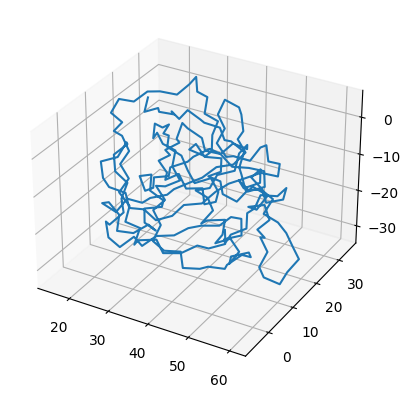

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(my_new_df.X_COORD, my_new_df.Y_COORD, my_new_df.Z_COORD)

What follows:
```
for i in prots: # given that prots is a dictionary with the proteins as keys and the dataframes as values.
    randomforest.fit(prots[i])
```